목차 : <br>
2-1 데이터 집합 불러오기<br>
2-2 데이터 추출하기<br>
2-3 기초적인 통계 계산하기<br>
2-4 그래프 그리기<br>

## 02-1 데이터 집합 불러오기
데이터 출처 : https://github.com/easysIT/doit_pandas


In [5]:
# 현재 디렉토리 구조는 이러하다.
import os
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Do it! 판다스 입문 02.판다스 시작하기.ipynb',
 'notebook',
 'output',
 'README.md']

In [2]:
import pandas as pd
df = pd.read_csv('data/gapminder.tsv', sep = '\t')

불러온 데이터 집합 살펴보기

In [7]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


df의 자료형 살펴보기<br>
* pandas 라이브러리로 불러왔으니 당연히 DataFrame일 것이다.

In [12]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


df의 행과 열의 정보를 shape라는 속성에 저장하고 있다.

In [11]:
print(df.shape)

(1704, 6)


이번에는 갭마인더라는 데이터에 어떤 변수들이 있는지 살펴본다.

In [15]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

위에서 데이터가 어떻게 생겼는지 (head)<br>
어떤 속성이었는지, 크기는 얼마만큼인지, 어떤 변수를 가지고 있는지 확인 했다면<br>
이번에는 각 변수를 좀더 자세히 본다. 

In [19]:
print(df.dtypes)
print('-'*50)
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


| 판다스 자료형 | 파이썬 자료형   | 설명   |
| :------------ | :---------------| :----- |
| object        | string          | 문자열 |
| int64         | int             |  정수  |
| float64       | float           |    소수점을 가진 숫자 |
| datetime64    | datetime        | datetime 라이브러리가 반환하는 자료형|

## 02-2 데이터 추출하기

### 열 단위 추출하기

In [23]:
country_df = df['country']
print(type(country_df)) # 아마 Series가 나올 것이다.
print('-'*50)
print(country_df.head())
print('-'*50)
print(country_df.tail())

<class 'pandas.core.series.Series'>
--------------------------------------------------
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
--------------------------------------------------
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


DataFrame에서 변수를 하나만 가져오면 Series를 얻을 수 있다. (강제로 얻게 된다.) <br>
Series 또한, head와 tail 메서드를 가지고 있기 때문에 위의 코드가 작동한다.<br>
<br>
그렇다면, DF에서 여러개의 열 이름을 가져오면 어떻게 될까?

In [25]:
subset = df[['country', 'continent', 'year']]
print(type(subset))
print('-'*50)
print(subset.head())
print('-'*50)
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
--------------------------------------------------
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
--------------------------------------------------
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


예상 했듯이, DF와 동일한 DataFrame 속성을 띄고 있다. <br>
이번에는, 열(col)이 아닌 행(row)으로 접근하려먼 어떻게 해야 될까?

|속성|설명|
| -- | -- |
|loc|인덱스를 기준으로 데이터 추출|
|iloc|행 번호를 기주능로 데이터 추출|

### 행단위 데이터 추출하기
#### 1. loc 

In [28]:
print(df.loc[0])
print('-'*50)
print(df.loc[99])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
--------------------------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


DF의 마지막 행(row)의 정보를 불러오는 방법
* df.shape[0] --> 1704개의 데이터가 저장되어 있다.
* 행 번호는 0번부터 시작하니, 1704 - 1 = 1703번째 데이터가 마지막 데이터다.

In [29]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [31]:
print(df.tail(n=1)) # tail을 이용하면 좀더 쉽게 구할 수 있다.

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [32]:
print(df.loc[[0,99,999]]) #여러 행을 한번에 조회할 때는 loc가 편리하다.

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


#### 2. iloc

loc는 DF의 인덱스를 사용하여 데이터를 추출했지만, iloc는 데이터의 순서를 의미하는 <span style= color:red>행번호</span>를 사용하여 데이터를 추출

In [34]:
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


### 데이터 추출하기 - 슬라이싱, range

In [42]:
# loc 활용
subset_loc = df.loc[:, ['year', 'pop']]
subset_iloc = df.iloc[:, [2,4]]

all(subset_iloc == subset_loc)

True

.모든 데이터가 동일하다. 즉, iloc와 loc 둘다 동일한 데이터를 추출할 수 있지만, 받는 속성이 다르다.<br>
* loc = 컬럼의 이름
* iloc = 컬럼의 번호

In [43]:
print(df.iloc[:, :3].head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [44]:
print(df.iloc[:, range(3)].head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [45]:
Even = range(0,6,2)
print(df.iloc[:, Even].head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [47]:
print(df.iloc[:,0:6:2].head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


range(0,6,2) == 0:6:2 

처음 알았다!!! range가 쓰기 귀찮을 때는 :: 콜론을 두번 쓰면 되겠다.

## 기초적인 통계 계산하기
### 그룹화한 데이터의 평균 구하기

In [60]:
print( df.groupby(['year'])['lifeExp'].agg('mean') ) 

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


### 두가지 이상 변수를 사용하여 group by

In [66]:
multi_group = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg('mean')
print(multi_group.head(n = 15))

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430


groupby()에 들어가는 변수도 리스트<br>
뒤에 들어가는 변수도 리스트로 들어간다!! 

## 02-4 그래프 그리기

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
global_yearly_lisr_expectancy = df.groupby(['year'])['lifeExp'].agg('mean')
print(global_yearly_lisr_expectancy )

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


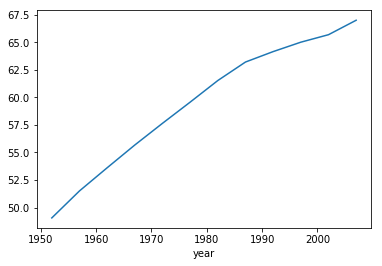

In [69]:
global_yearly_lisr_expectancy.plot()

책은 여기서 마무리 된다. <br>

기본적인 내용이라 이미 알고 있는 내용들이 다수 있었지만,<br> 
새로 배운 내용이 존재 했다. 
 * range(0,6,2) == 0:6:2
 * df.plot()

## 다음에는 기본 자료형인 데이터 프레임과 시리즈를 좀더 자세히 알아본다.